In [16]:
# Import Essential Libraries 
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load Dataset
df=pd.read_csv('improved_disease_dataset.csv')
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [3]:
df.shape

(2000, 11)

In [4]:
# Check missing values
df.isnull().sum()

fever          0
headache       0
nausea         0
vomiting       0
fatigue        0
joint_pain     0
skin_rash      0
cough          0
weight_loss    0
yellow_eyes    0
disease        0
dtype: int64

In [5]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['disease']=le.fit_transform(df['disease'])
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29


In [6]:
# features and target separation
X=df.drop('disease',axis=1)
y=df['disease']

In [7]:
# Train Test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
# Apply Gradient Boosting Classifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier
best_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
best_model.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [9]:
y_pred = best_model.predict(X_test)

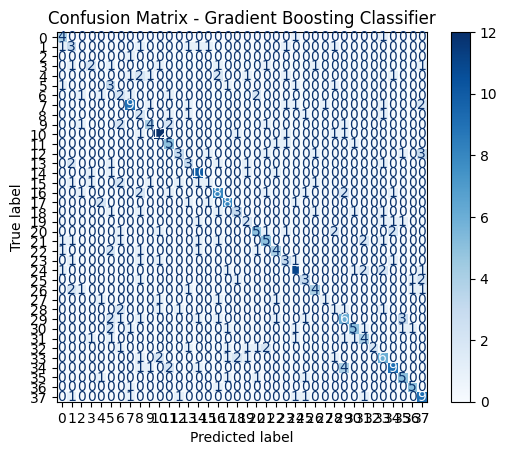

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Blue color map
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

In [13]:
cm

array([[4, 0, 0, ..., 0, 0, 0],
       [1, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 1, 0, ..., 0, 0, 9]], shape=(38, 38))

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")



Model Accuracy: 43.00%


In [11]:
import joblib
joblib.dump(best_model,'best_model.pkl')
joblib.dump(le,'label_encode.pkl')

['label_encode.pkl']